In [3]:
# 3.4 电影评论分类：二分类问题
from keras.datasets import imdb

# 参数保留数据中前10000个最常出现的单词。
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

Using TensorFlow backend.


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
# 0代表负面，1代表正面
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# 将某条评论解码为英文单词
word_index = imdb.get_word_index() # word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences) , dimension)) # 创建一个形状为(len(sequences) , dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 将训练数据向量化
x_test = vectorize_sequences(test_data) # 将测试数据向量化

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_test)

[0. 1. 1. ... 0. 0. 0.]


In [11]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
# 编译模型
# 优化器，损失函数，指标
model.compile(
    optimizer='rmsprop', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# 训练模型
# history是一个字典对象，包含训练过程中的所有数据
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 20个轮次
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 364us/step - loss: 0.5098 - accuracy: 0.7797 - val_loss: 0.4059 - val_accuracy: 0.8472
Epoch 2/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.3046 - accuracy: 0.9034 - val_loss: 0.3045 - val_accuracy: 0.8872
Epoch 3/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.2246 - accuracy: 0.9261 - val_loss: 0.2967 - val_accuracy: 0.8824
Epoch 4/20
15000/15000 [==============================] - 4s 276us/step - loss: 0.1778 - accuracy: 0.9445 - val_loss: 0.2943 - val_accuracy: 0.8806
Epoch 5/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.1452 - accuracy: 0.9555 - val_loss: 0.2797 - val_accuracy: 0.8891
Epoch 6/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.1231 - accuracy: 0.9626 - val_loss: 0.3016 - val_accuracy: 0.8824
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

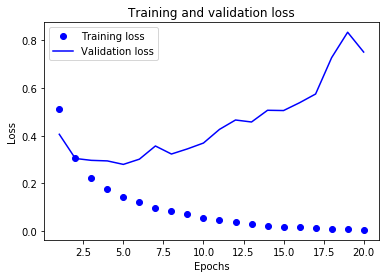

In [16]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1 )

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b'代表蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

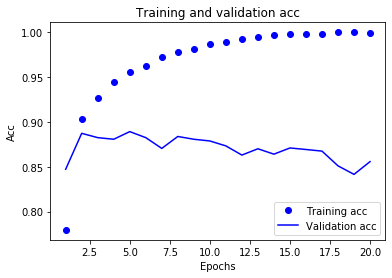

In [17]:
# 绘制训练精度和验证精度
plt.clf() # 清空图像
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 5s 197us/step - loss: 0.4533 - accuracy: 0.8197
Epoch 2/4
25000/25000 [==============================] - 5s 194us/step - loss: 0.2611 - accuracy: 0.9084
Epoch 3/4
25000/25000 [==============================] - 5s 194us/step - loss: 0.2018 - accuracy: 0.9276
Epoch 4/4
25000/25000 [==============================] - 3s 100us/step


In [19]:
results

[0.33015009629249575, 0.8701199889183044]

In [20]:
# predict方法得到评论为正面的可能性大小
model.predict(x_test)

array([[0.12853287],
       [0.99992776],
       [0.50362825],
       ...,
       [0.06333905],
       [0.0495255 ],
       [0.3869212 ]], dtype=float32)